In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
sys.path.append("..")
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from src.unet_models import MODELS

In [2]:
train_x = np.load('../DATASETS/noise_7e-3/src/no_indiv_per_train_6oct_1_512_128_064_032_016_SRC_30_exe_100.npy')
train_y = np.load('../DATASETS/noise_7e-3/label/no_indiv_per_train_6oct_1_512_128_064_032_016_LABEL_30_exe_100.npy')

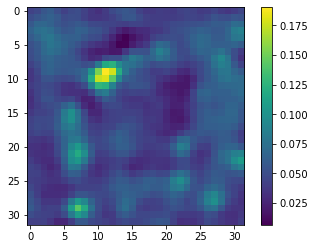

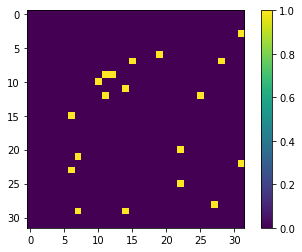

In [3]:
samp = np.random.randint(4,train_x.shape[0],1)[0]
plt.figure()
plt.imshow(train_x[samp])
plt.colorbar()

plt.figure()
plt.imshow(train_y[samp])
plt.colorbar()

In [4]:
bins = 32
channel = 1
loss_func = 'mse'
lr = '1e-4'
opt = tf.keras.optimizers.Nadam(learning_rate=float(lr))
metric = 'mae'
reg = '0'
filt_lst = [64,128,256,512]
dns = 256
drop = '0'
batch_size = 256#
ep=100

In [5]:
get_model = MODELS()
model_type="Unet16"

if model_type=="attention_resunet":
    FILTER_NUM = 16
    FILTER_SIZE = 3
    NUM_CLASSES = 1
    dropout_rate = 0.2
    batch_norm = False
    model = get_model.Attention_ResUNet(bins,channel,loss_func,opt,metric,FILTER_NUM=FILTER_NUM,batch_norm = False, dropout_rate = float(drop))
elif model_type=="unetpp":
    nb_filter = [16, 32, 64, 128, 256]
    deep_supervision = False
    model = get_model.Nest_Net(bins,channel,loss_func,opt,metric,nb_filter=nb_filter,deep_supervision=deep_supervision)
elif model_type=="Unet16":
    filt_num = 16
    model = get_model.UNET(bins, channel, loss_func, opt, metric, float(reg), filt_num)
elif model_type=="vgg16":
    model = get_model.VGG16(filt_lst,dns,bins,channel,loss_func,opt,metric)
elif model_type=="resUnet":
    model = get_model.resUnet(bins, channel, loss_func, opt, metric, float(reg))
elif model_type=="unetPP48163264":
    nb_filter = [4,8,16,32,64]
    filters = [4,8,16,32,64]
    model = get_model.unetPP(bins,channel,loss_func,opt,metric,float(reg), nb_filter, filters)

folder_name = 'noise_7e-3'
chnl = 'ch0'
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1)
mc = tf.keras.callbacks.ModelCheckpoint(f'../models/{folder_name}/{model_type}_{folder_name}_{loss_func}_lr_{lr}_{ep}_DROPOUT{reg}.h5',
                                       monitor='val_loss', model='min', verbose=1, save_best_only=True)


history=model.fit(train_x[:],train_y[:],
                batch_size=batch_size,epochs=ep,
                validation_split=0.33,shuffle=True, callbacks=[callback,mc])

layer output: (None, 32, 32, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   160         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 16)   2320        ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 16)   0           ['conv2d_1[0][0]']               
                                                              

8/8 [==============================] - 0s 46ms/step - loss: 0.0094 - mae: 0.0238 - val_loss: 0.0239 - val_mae: 0.0342
Epoch 3/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0092 - mae: 0.0171
Epoch 3: val_loss improved from 0.02388 to 0.02367, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_100_DROPOUT0.h5
8/8 [==============================] - 0s 59ms/step - loss: 0.0092 - mae: 0.0171 - val_loss: 0.0237 - val_mae: 0.0330
Epoch 4/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0092 - mae: 0.0171
Epoch 4: val_loss improved from 0.02367 to 0.02340, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_100_DROPOUT0.h5
8/8 [==============================] - 0s 62ms/step - loss: 0.0091 - mae: 0.0170 - val_loss: 0.0234 - val_mae: 0.0328
Epoch 5/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0089 - mae: 0.0169
Epoch 5: val_loss improved from 0.02340 to 0.02315, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_l

8/8 [==============================] - 0s 61ms/step - loss: 0.0071 - mae: 0.0131 - val_loss: 0.0191 - val_mae: 0.0301
Epoch 27/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0069 - mae: 0.0128
Epoch 27: val_loss improved from 0.01912 to 0.01912, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_100_DROPOUT0.h5
8/8 [==============================] - 0s 58ms/step - loss: 0.0070 - mae: 0.0130 - val_loss: 0.0191 - val_mae: 0.0279
Epoch 28/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0069 - mae: 0.0126
Epoch 28: val_loss improved from 0.01912 to 0.01892, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_100_DROPOUT0.h5
8/8 [==============================] - 0s 59ms/step - loss: 0.0069 - mae: 0.0127 - val_loss: 0.0189 - val_mae: 0.0279
Epoch 29/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0068 - mae: 0.0123
Epoch 29: val_loss improved from 0.01892 to 0.01891, saving model to ../models/noise_7e-3\Unet16_noise_7e-3

7/8 [=========================>....] - ETA: 0s - loss: 0.0055 - mae: 0.0101
Epoch 51: val_loss improved from 0.01645 to 0.01643, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_100_DROPOUT0.h5
8/8 [==============================] - 0s 60ms/step - loss: 0.0055 - mae: 0.0099 - val_loss: 0.0164 - val_mae: 0.0276
Epoch 52/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0055 - mae: 0.0100
Epoch 52: val_loss improved from 0.01643 to 0.01628, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_100_DROPOUT0.h5
8/8 [==============================] - 0s 61ms/step - loss: 0.0055 - mae: 0.0099 - val_loss: 0.0163 - val_mae: 0.0244
Epoch 53/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0054 - mae: 0.0096
Epoch 53: val_loss did not improve from 0.01628
8/8 [==============================] - 0s 47ms/step - loss: 0.0054 - mae: 0.0096 - val_loss: 0.0163 - val_mae: 0.0231
Epoch 54/100
7/8 [=========================>....] - ETA: 0s - loss: 0.00

Epoch 77/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0045 - mae: 0.0081
Epoch 77: val_loss did not improve from 0.01555
8/8 [==============================] - 0s 46ms/step - loss: 0.0045 - mae: 0.0081 - val_loss: 0.0156 - val_mae: 0.0228
Epoch 78/100
8/8 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0081
Epoch 78: val_loss did not improve from 0.01555
8/8 [==============================] - 0s 50ms/step - loss: 0.0045 - mae: 0.0081 - val_loss: 0.0156 - val_mae: 0.0223
Epoch 79/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0044 - mae: 0.0080
Epoch 79: val_loss improved from 0.01555 to 0.01552, saving model to ../models/noise_7e-3\Unet16_noise_7e-3_mse_lr_1e-4_100_DROPOUT0.h5
8/8 [==============================] - 0s 64ms/step - loss: 0.0044 - mae: 0.0080 - val_loss: 0.0155 - val_mae: 0.0229
Epoch 80/100
7/8 [=========================>....] - ETA: 0s - loss: 0.0044 - mae: 0.0080
Epoch 80: val_loss did not improve from 0.01552
8/8 [=====

In [6]:
train_X = train_x.reshape(train_x.shape[0],32,32,1)#/np.max(train_x)
train_Y = train_y.reshape(train_y.shape[0],32,32,1)

In [ ]:
batch_size = 64
epochs = 2500
history = model.fit(train_X, train_Y,
          batch_size=batch_size,
          epochs=epochs,
          #validation_split=.33,
          validation_split = 0.33,          
          verbose=1,
          callbacks=[callback, mc])

Epoch 1/2500
32/32 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0068
Epoch 1: val_loss did not improve from 0.01549
32/32 [==============================] - 6s 81ms/step - loss: 0.0038 - mae: 0.0068 - val_loss: 0.0159 - val_mae: 0.0218
Epoch 2/2500
32/32 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0065
Epoch 2: val_loss did not improve from 0.01549
32/32 [==============================] - 1s 21ms/step - loss: 0.0037 - mae: 0.0065 - val_loss: 0.0161 - val_mae: 0.0213
Epoch 3/2500
29/32 [==========================>...] - ETA: 0s - loss: 0.0035 - mae: 0.0063
Epoch 3: val_loss did not improve from 0.01549
32/32 [==============================] - 1s 23ms/step - loss: 0.0035 - mae: 0.0063 - val_loss: 0.0161 - val_mae: 0.0220
Epoch 4/2500
31/32 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0061
Epoch 4: val_loss did not improve from 0.01549
32/32 [==============================] - 1s 24ms/step - loss: 0.0034 - mae: 0.0061 - val